# Unconstrained minimization algorithms

Consider the following quadratic unconstrained problem

$$
\begin{array}{lll}
\textrm{minimize}   & f(x) = \frac{1}{2}x^{T}Ax + b^{T}x + c & \\
\end{array}
$$

where $A$ is a symmetric $n \times n$ matrix, $x,b \in \mathbb{R}^{n}$, and $c \in \mathbb{R}$.

$f$ is a $C^{\infty}$-function with

$$
\nabla f(x) = Ax + b \quad\text{and}\quad \nabla^{2} f(x) = A.
$$



- $f$ is convex $\iff A \succeq 0$ (positive semi-definite).
  - **Local minima are global for convex functions!** (See [Theorem 6](Theorem6)).
- $f$ is strict convex $\iff A \succ 0$ (positive definite).
  - $A$ invertible and $x^{*} = -A^{-1}b$ is the **unique global minimum**.
- $A \nsucceq 0 \implies f$ has no local minima.

(gradient_methods)=
## Gradient methods

The general idea of gradient methods is
to find the minimum of an optimization problem of the form

$$
\begin{array}{lll}
\textrm{minimize} & f(x), & \\
\end{array}
$$

with $x \in \mathbb{R}^{n}$ and $f \in C^{1}(\mathbb{R}^{n},\mathbb{R})$.

Many common solution strategies try to find the minimum step-wise.
From a **starting point** $x^{0} \in \mathbb{R}^{n}$
in each step $k = 0, 1, \ldots$ those strategies determine

1. a **descent direction** $d^{k} \in \mathbb{R}^{n}$ and
2. a positive bounded **step size** $0 < \alpha^{k} < \delta$,
   with $\alpha^{k}, \delta \in \mathbb{R}$,

such that the objective function value at a new point

$$
x^{k + 1} = x^{k} + \alpha^{k} d^{k}, \quad k = 0, 1, \ldots
$$

is smaller than the previous one $f(x^{k + 1}) < f(x^{k})$.

A vector $d^{k} \in \mathbb{R}^{n}$ is called **descent direction**
in a point $x^{k} \in \mathbb{R}^{n}$,
if there exists a $\delta > 0$ such that for all
$0 < \alpha^{k} < \delta$ the inequality

$$
f(x^{k} + \alpha^{k} d^{k}) < f(x^{k})
$$

holds.

The following figure sketches
$\Phi(\alpha^{k}) = f(x^{k} + \alpha^{k} d^{k})$,
that is the objective function value
as function of the step size $\alpha^{k}$
for a given descent direction $d^{k}$ at a given point $x^{k}$.

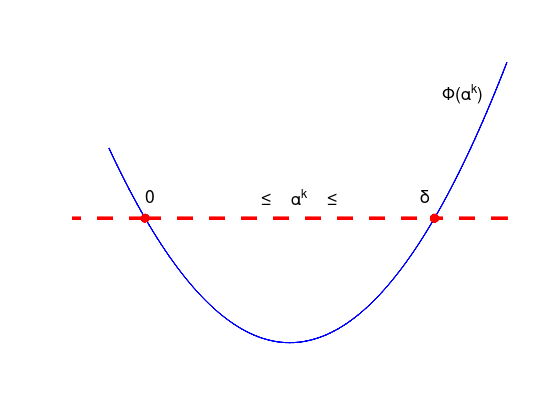

In [1]:
alpha = linspace (-0.5, 5, 100);
phi = (alpha - 2).^2 + 2;
plot (alpha, phi, 'LineWidth', 2, 'b');
hold on;
plot ([-2, 0, 4, 6], [6, 6, 6, 6], 'LineWidth', 4, 'ro--');
xlim ([-1, 5]);
ylim ([ 1, 12]);
axis off;
tprops = {'FontSize', 18};
text (0.0, 6.7, '0', tprops{:});
text (1.6, 6.7, '\leq     \alpha^{k}     \leq', tprops{:});
text (3.8, 6.7, '\delta', tprops{:});
text (4.1, 10, '\Phi(\alpha^{k})', tprops{:});

According to **Taylor's theorem**,
close to a point $x^{k} \in \mathbb{R}^{n}$
a function $f \in C^{1}(\mathbb{R}^{n},\mathbb{R})$
can be locally approximated by a linear function

$$
\tilde{f}(x^{k} + \alpha^{k} d^{k}) := f(x^{k}) + \nabla f(x^{k})^{T}(\alpha^{k} d^{k})
$$

or if $f \in C^{2}(\mathbb{R}^{n},\mathbb{R})$ by a quadratic function

$$
\tilde{f}(x^{k} + \alpha^{k} d^{k}) := f(x^{k}) + \nabla f(x^{k})^{T}(\alpha^{k} d^{k})
  + \frac{1}{2}(\alpha^{k} d^{k})^{T}\nabla^{2} f(x^{k})(\alpha^{k} d^{k}).
$$

:::{admonition} **Theorem 5:** Descent direction
:class: tip

If $\nabla f(x^{k})^{T}d^{k} < 0$ holds, then $d^{k}$ is a descent direction of $f$ in the point $x^{k}$.

:::

:::{dropdown} *Proof:*

For the $C^{1}$-function $\Phi(\alpha^{k}) := \tilde{f}(x^{k} + \alpha^{k} d^{k})$
there is $\Phi'(0) = \nabla f(x^{k})^{T} d^{k}$ < 0.
From this follows the assertion.

$$\tag*{$\Box$}$$

:::

### Gradient Descent

The most obvious choice for such a descent direction
is $d^{k} := -\nabla f(x^{k})$.
This leads to the first algorithm for unconstrained minimization problems.

:::{note}

**Gradient descent** or **steepest descent** performs the iteration:

$$
x^{k + 1} = x^{k} - \alpha^{k} \nabla f(x^{k}), \quad k = 0, 1, \ldots
$$

:::

#### What can go wrong?

Consider the function $f(x) = x^2$,
the descent directions $d^{k} = (-1)^{k + 1}$,
the step sizes $\alpha^{k} = 2 + \frac{3}{2^{k + 1}}$
and a starting point $x_{0} = 2$.

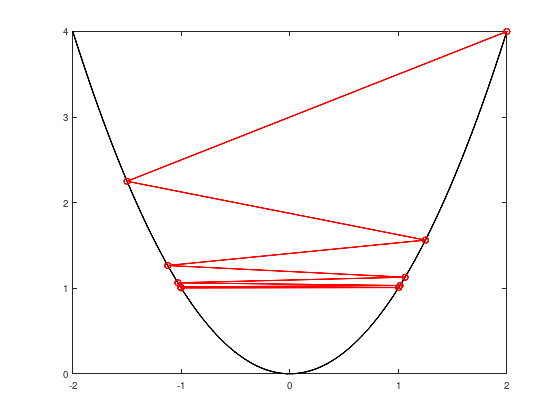

In [2]:
f = @(x) x.^2;
x = linspace (-2, 2, 100);
plot (x, f(x), 'k', 'LineWidth', 2);
hold on;

alpha = @(k) 2 + 3 / 2^(k + 1);

N = 10;
x = zeros (1, N);
x(1) = 2;
for k = 1:(N - 1)
  x(k + 1) = x(k) + alpha(k - 1) * (-1)^(k);
end

plot (x, f(x), 'ro-', 'LineWidth', 2);

**Step size too large:** convergence against pair $\pm 1$.

Consider the function $f(x) = x^2$,
the descent directions $d^{k} = -1$,
the step sizes $\alpha^{k} = \frac{1}{2^{k + 1}}$
and a starting point $x_{0} = 2$.

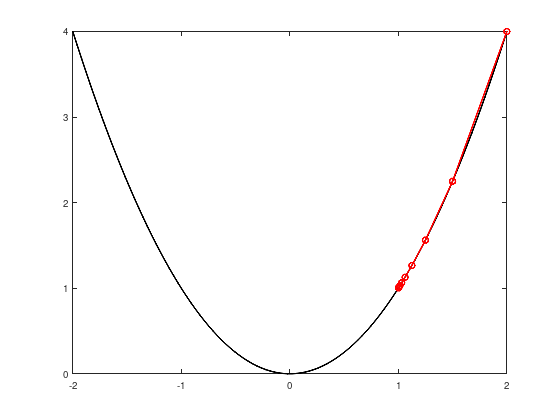

In [3]:
f = @(x) x.^2;
x = linspace (-2, 2, 100);
plot (x, f(x), 'k', 'LineWidth', 2);
hold on;

alpha = @(k) 1 / 2^(k + 1);

N = 10;
x = zeros (1, N);
x(1) = 2;
for k = 1:(N - 1)
  x(k + 1) = x(k) + alpha(k - 1) * (-1);
end

plot (x, f(x), 'ro-', 'LineWidth', 2);

**Step size too short.**

#### Choosing the step size

From the two (admittedly constructed) examples of the previous section
it becomes apparent
that not any **step size** $\alpha^{k}$ is suiteable
for the **gradient descent method** or other **gradient methods**.

One classical method to choose the step size
is the **Armijo rule**.
This method is in general not efficient,
but illustrates key ideas
about other step size determination methods.

A possible Matlab/Octave implementation of the Armijo rule
is given in the following listing.
To improve readability,
the step index $k$ has been omitted.

The inputs of the `armijo_rule` function are:
a $C^{1}$-function $f$,
a current iteration point $x := x^{k}$
with its first derivate $\texttt{dfx} := \nabla f(x^{k})$,
and a descent direction $d := d^{k}$.

Furthermore,
three parameters are defined in the function:
a start value for the step size $\texttt{alpha} := \alpha^{k}$,
$\texttt{beta} := \beta$ with $0 < \beta < 1$,
and a shrink factor $\texttt{tau} := \tau$ with $0 < \tau < 1$.

In [4]:
function alpha = armijo_rule (f, x, dfx, d)
  alpha = 1;    % initial value
  beta  = 0.1;
  tau   = 0.5;  % shrink factor
  fx    = f(x);
  while (f(x + alpha * d) > fx + alpha * beta * (dfx' * d))
    alpha = tau * alpha;  % shrink alpha
  end
end

An illustration of the algorithm is given in the following Figure.

Starting with some value for $\alpha^{k}$,
the value is shrunk by $\tau$
until the objective function value
$f(x^{k} + \alpha^{k} d^{k})$
is below the red line, depending on $\beta$.

This ensures a decreasing objective function value.
However,
a bad parameter choice might slow the convergence down.

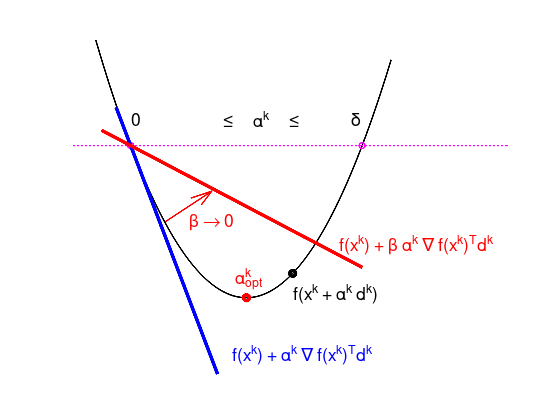

In [5]:
alpha = linspace (-0.6, 4.5, 100);
phi = (alpha - 2).^2 + 2;
plot (alpha, phi, 'LineWidth', 2, 'k');
hold on;
plot ([-2, 0, 4, 9], [6, 6, 6, 6], 'LineWidth', 2, 'mo:');
alpha = linspace (-0.25, 1.5, 10);
plot (alpha,        -4 * alpha + 6, 'LineWidth', 4, 'b-');
beta = 0.2;
alpha = linspace (-0.5, 4, 10);
plot (alpha, beta * -4 * alpha + 6, 'LineWidth', 4, 'r-');
plot (2, 2, 'LineWidth', 4, 'ro');
plot (2.8, 0.8^2 + 2, 'LineWidth', 4, 'ko');
xlim ([-1, 6.5]);
ylim ([ 0, 9]);
axis off;
tprops = {'FontSize', 18};
text (0.0, 6.7, '0', tprops{:});
text (1.6, 6.7, '\leq     \alpha^{k}     \leq', tprops{:});
text (3.8, 6.7, '\delta', tprops{:});
text (2.8, 2.1, 'f(x^{k} + \alpha^{k} d^{k})', tprops{:});
text (3.6, 3.4, 'f(x^{k}) + \beta \alpha^{k} \nabla f(x^{k})^{T}d^{k}', ...
      tprops{:}, 'Color', 'red');
text (1.75, 0.5, 'f(x^{k}) + \alpha^{k} \nabla f(x^{k})^{T}d^{k}', ...
      tprops{:}, 'Color', 'blue');
text (1.8, 2.5, '\alpha^{k}_{opt}', tprops{:}, 'Color', 'red');
quiver (0.6, 4, 0.8, 0.8, 'LineWidth', 2, 'r');
text (1, 4, '\beta \rightarrow 0', tprops{:}, 'Color', 'red');

In the optimization literature,
depending on the given particular problem,
there are better algorithms for choosing the step size available.

#### Example: gradient descent zig-zagging

Consider the quadratic unconstrained problem
with the quadratic objective function

$$
f(x,y) = \frac{1}{2}(x^2 + M y^2)
       = \frac{1}{2}\begin{pmatrix} x & y \end{pmatrix}
                    \begin{pmatrix} 1 & 0 \\ 0 & M \end{pmatrix}
                    \begin{pmatrix} x \\ y \end{pmatrix}
$$

and with the respective gradient

$$
\nabla f(x,y) = \begin{pmatrix} x \\ My \end{pmatrix}.
$$

The step sizes $\alpha^{k}$ are determined by the **Armijo rule**
and consider the starting point $x_{0} = (M, 1)^{T}$
for different values of $M$.

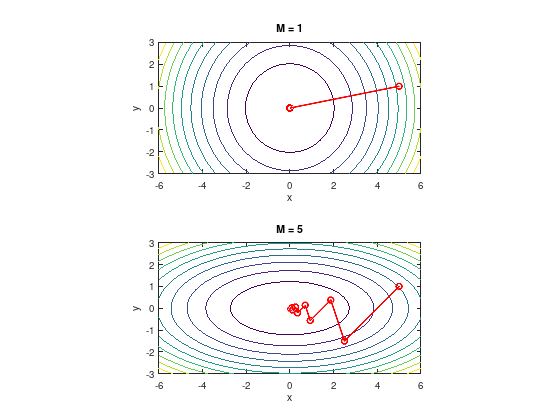

In [6]:
MM = [1, 5];
for i = 1:2
  subplot (2, 1, i);
  M = MM(i);
  f = @(x,y) (x.^2 + M * y.^2) / 2;
  [x, y] = meshgrid (linspace (-6, 6, 40), ...
                     linspace (-3, 3, 40));
  contour (x, y, f(x,y));
  hold on;

  f = @(x) (x(1,:).^2 + M * x(2,:).^2) / 2;
  df = @(x) [x(1); M * x(2)];  % Gradient

  N = 10;
  x = zeros (2, N);
  x(:,1) = [5; 1];
  for k = 1:(N - 1)
    d = df(x(:,k));
    alpha = armijo_rule (f, x(:,k), d, -d);
    x(:,k + 1) = x(:,k) - alpha * d;
  end
  plot3 (x(1,:), x(2,:), f(x), 'ro-', 'LineWidth', 2);
  axis equal;
  title (['M = ', num2str(M)]);
  xlabel ('x');
  ylabel ('y');
end

- Fast convergence, if $M$ close to 1.
  The gradient "points" in the direction of the global minimum.

- Slow zig-zagging, if $M \gg 1$ or $M \ll 1$.
  In each step the gradient "points away" from the global minimum.

- **Note:** with optimal step size, the convergence behavior is similar.

(Newtons_method)=
### Newton's method

A more sophisticated choice for the descent direction $d^{k}$
can be obtained from the quadratic Taylor approximation.

Like in the example from the introduction
this is a quadratic unconstrained problem
and it has a unique global minimum,
if the Hessian matrix is positive definite.

Thus deriving the quadratic Taylor approximation to $d^{k}$
and choosing without loss of generality $\alpha^{k} = 1$,
one obtains for the first order necessary condition

$$
\nabla \tilde{f}(x^{k} + d^{k}) := \nabla f(x^{k}) + \nabla^{2} f(x^{k}) d^{k} = 0.
$$

Finally, the descent direction $d^{k}$ is the solution of the following
linear system of equations:

$$
\nabla^{2} f(x^{k}) d^{k} = -\nabla f(x^{k}).
$$

:::{note}

**Newton's method** performs the iteration:

$$
x^{k + 1} = x^{k} - \alpha^{k} (\nabla^{2} f(x^{k}))^{-1} \nabla f(x^{k}), \quad k = 0, 1, \ldots
$$

:::

#### Example: Newton's method

Consider again the previous quadratic unconstrained problem
with the objective function
$f(x,y) = \frac{1}{2}(x^2 + M y^2)$.

The step sizes are $\alpha^{k} = 1$
and consider the starting point $x_{0} = (M, 1)^{T}$
for different values of $M$.

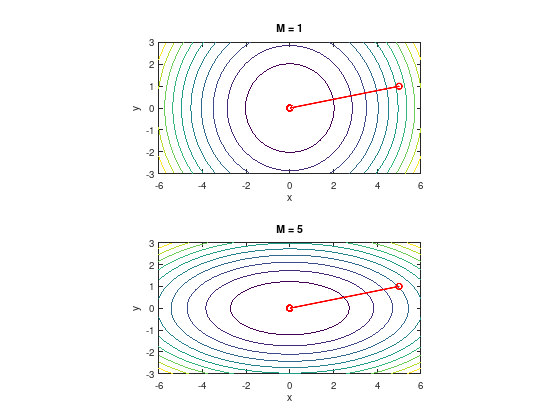

In [7]:
MM = [1, 5];
for i = 1:2
  subplot (2, 1, i);
  M = MM(i);
  f = @(x,y) (x.^2 + M * y.^2) / 2;
  [x, y] = meshgrid (linspace (-6, 6, 40), ...
                     linspace (-3, 3, 40));
  contour (x, y, f(x,y));
  hold on;

  f = @(x) (x(1,:).^2 + M * x(2,:).^2) / 2;
  fgrad = @(x) [x(1); M * x(2)];  % Gradient
  fhess = [1, 0; 0, M];           % Hessian matrix

  N = 10;
  x = zeros (2, N);
  x(:,1) = [5; 1];
  for k = 1:(N - 1)
    d = fhess \ -fgrad(x(:,k));
    x(:,k + 1) = x(:,k) + d;
  end
  plot3 (x(1,:), x(2,:), f(x), 'ro-', 'LineWidth', 2);
  axis equal;
  title (['M = ', num2str(M)]);
  xlabel ('x');
  ylabel ('y');
end

While the gradient descent method converged in the latter case zig-zagging,
Newton's method seems unaffected by the elliptic shape of the objective function
and converges in one step.

This beneficial convergence behavior
comes at the price of having to evaluate the Hessian matrix
and solving a linear system of equations in each iteration step.

## Choices of stopping criteria

As important as good convergence towards the minimal point,
is to decide when to stop the optimization algorithm.

In literature there is a huge choice of stopping criteria,
just to list a few:

1. $\quad f(x^{k-1}) - f(x^{k}) \quad \leq \quad \text{TOL} (1 + \lvert f(x^{k}) \rvert )$

2. $\quad \lVert x^{k-1} - x^{k} \rVert \quad \leq \quad \text{TOL} (1 + \lVert x^{k} \rVert )$

3. $\quad \lVert \nabla f(x^{k}) \rVert \quad \leq \quad \text{TOL} (1 + \lvert f(x^{k}) \rvert )$

4. $\quad \lVert \nabla f(x^{k}) \rVert \quad \leq \quad$ machine precision

5. $\quad k \quad \geq \quad k_{\max}$

Criteria 1 to 3 monitor the progress of the algorithm,
while criteria 4 and 5 can be regarded as "emergency breaks".
It is useful to implement criteria like 4 and 5
to avoid **infinite loops** or to stop stuck algorithm runs.

However, it often depends on the given problem
which other stopping criteria are useful.
For example,
if the objective function is expensive to evaluate,
"cheap" stopping criteria which do not cause computational overhead
or are computed by the algorithms anyways might be preferable.

## Further approaches

Other gradient methods follow in principal the form

$$
x^{k + 1} = x^{k} - \alpha^{k} D^{k} \nabla f(x^{k}), \quad k = 0, 1, \ldots,
$$

where $D^{k} \succ 0$ is a symmetric positive definite matrix.

For example:

- **Diagonally scaled steepest descent**

  $D^{k}$ is a diagonal approximation to $(\nabla^{2} f(x^{k}))^{-1}$

- **Modified Newton's method**

  $$
  D^{k} = (\nabla^{2} f(x^{0}))^{-1}, \quad k = 0, 1, \ldots
  $$

- **Discretized Newton's method**

  $$
  D^{k} = (H(x^{k}))^{-1}, \quad k = 0, 1, \ldots,
  $$
  
  where $H(x^{k})$ is a finite difference based approximation of $\nabla^{2} f(x^{k})$.

  For example the **forward-** and **central finite difference** formulas:
  
  $$
  \frac{\partial f(x^{k})}{\partial x_{i}} \approx \frac{1}{h}
    \left( f(x^{k} + he_{i}) - f(x^{k}) \right),
  $$
  
  $$
  \frac{\partial f(x^{k})}{\partial x_{i}} \approx \frac{1}{2h}
    \left( f(x^{k} + he_{i}) - f(x^{k} - he_{i}) \right),
  $$
  
  where $e_{i}$ is the $i$-th unit vector and $h$ an appropriate small quantity
  taller than the machine precision.

- **Quasi Newton Methods**

  Another strategy to avoid the computationally expensive evaluation
  of the whole Hessian matrix in each step is to
  **update the existing Hessian matrix** in the so-called
  **Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm**:
  
  Determine a new step $x^{k + 1}$ from solving the Newton direction
  with Hessian matrix approximation $D^{k}$.
  Then set
  $q^{k} = x^{k + 1} - x^{k}$ and
  $p^{k} = \nabla f(x^{k + 1}) - \nabla f(x^{k})$
  and finally update the current Hessian matrix approximation

  $$
  D^{k + 1} = D^{k} + \frac{p^{k}p^{k^{T}}}{p^{k^{T}}q^{k}}
                    - \frac{D^{k}q^{k}q^{k^{T}}D^{k}}{q^{k^{T}}D^{k}q^{k}}.
  $$


## Summary

The zoo of optimization algorithms and their flavors grows steadily.
It is beyond the scope of a seminar to cover them all in detail.

**Gradient descent** and **Newton's methods**
are well-studied in the optimization literature
and have been presented without detailed analysis or proof
of their convergence behavior.

Summarizing, typical pitfalls for **gradient methods** are:

- Step size too long or short ("damping", Armijo rule, etc.).

- Convergence to stationary points ($\nabla f(x) = 0$)
  that are no local minima (e.g. saddle points).

- Stagnation when starting at a stationary point.

- Alternating sequence of iteration points.

- No or slow convergence
  if started "too far" away from the local optimum.

- In case of Newton's method: $\nabla^{2} f(x^{k}) \nsucc 0$, convergence unknown.